In [1]:
import ai2thor
import copy
import time
import random
import ai2thor.controller
from datetime import datetime
import cv2
import os
import matplotlib.pyplot as plt
import os
# from utils.mid_level_constants import  scene_start_cheating_init_pose
from jupyter_helper import ENV_ARGS, initialize_arm, only_reset_scene, transport_wrapper, ADITIONAL_ARM_ARGS, execute_command

screen_size=900

ENV_ARGS['width'] = screen_size
ENV_ARGS['height'] = screen_size

controller = ai2thor.controller.Controller(**ENV_ARGS, renderDepthImage=True, renderInstanceSegmentation=True)
controller._build.url

thor-OSXIntel64-3ce9fe15a850b0a67e6ccd8fa92f317589caec83.zip: [ 100%  61.8 MiB/s]  of 520.MB


'http://s3-us-west-2.amazonaws.com/ai2-thor-public/builds/thor-OSXIntel64-3ce9fe15a850b0a67e6ccd8fa92f317589caec83.zip'

In [21]:
def translate(action):
    translation = {
        'MoveArmHeightM': 'j',
        'MoveArmHeightP': 'u',
        'MoveArmXM': 'a',
        'MoveArmXP': 's',
        'MoveArmZM': 'z',
        'MoveArmZP': 'w',
        'MoveArmYM': '4',
        'MoveArmYP': '3',
        'MoveAhead': 'm',
        'RotateRight': 'r',
        'RotateLeft': 'l',
        '':'',
        'Done':'q',
        'PickUp':'p', 
        'Finish': 'q',
        'Drop': 'd',
    }
    return translation[action]

def run_action_sequence(controller, action_sequence, object_id=None, target_location=None, logger_number=0, translated=False, seq_num_start = 0):
    picked_up = False
    if translated:
        translated_sequence = action_sequence
    else:
        translated_sequence = [translate(action) for action in action_sequence if action != '']
    for (seq_number, seq) in enumerate(translated_sequence):
        execute_command(controller, seq,ADITIONAL_ARM_ARGS)
                
def manual_task(scene_name, logger_number =0, final=False, reverse=False):
    only_reset_scene(controller, scene_name)
    all_actions = []
    actions_ran_so_far = 0
    while(True):
        action = input()
        if not reverse:
            action = translate(action)
        if action == 'q':
            break
        all_actions.append(action)
        
        run_action_sequence(controller, [action], 
                            logger_number=logger_number, translated=True, seq_num_start=actions_ran_so_far)
        actions_ran_so_far += 1
        plt.cla()
        plt.imshow(controller.last_event.frame)
        plt.show()
        
    print(scene_name)
    print(all_actions)

r


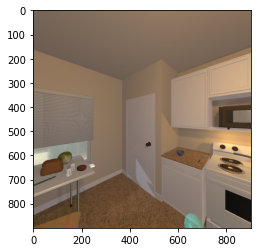

r


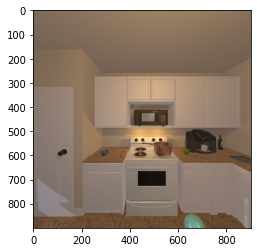

p


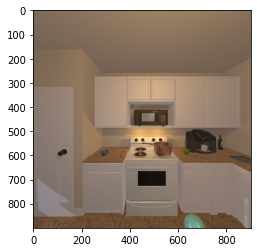

r


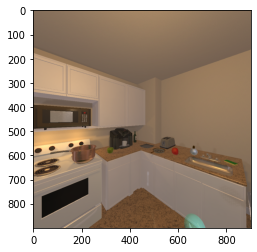

p


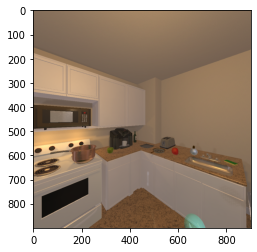

q
FloorPlan15_physics
['r', 'r', 'p', 'r', 'p']


In [49]:
manual_task(scene_name='FloorPlan15_physics', reverse=True)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
(controller.last_event.instance_masks['Microwave|+01.04|+01.68|-01.30'])

TypeError: Cannot interpret '0.0' as a data type

In [55]:

obj_id = 'Pot|-03.14|+00.96|+02.37'
obj_position = {'x': -2.0963223457336426,
   'y': 0.9608616232872009,
   'z': 3.5968814373016357}
transport_wrapper(controller, obj_id, obj_position)
# controller.last_event.objects_by_type('Tomato')

(<ai2thor.server.Event at 0x116a83dd8
     .metadata["lastAction"] = PlaceObjectAtPoint
     .metadata["lastActionSuccess"] = True
     .metadata["errorMessage"] = "
     .metadata["actionReturn"] = None
 >,
 [{'action': 'PlaceObjectAtPoint',
   'objectId': 'Pot|-03.14|+00.96|+02.37',
   'position': {'x': -2.0963223457336424,
    'y': 0.9608616232872009,
    'z': 3.5968814373016356},
   'forceKinematic': True},
  {'action': 'AdvancePhysicsStep', 'simSeconds': 1.0}])

In [5]:
ENV_ARGS['commit_id'] = 'a84dd29471ec2201f583de00257d84fac1a03de2'
controller = ai2thor.controller.Controller(**ENV_ARGS, renderDepthImage=True, renderInstanceSegmentation=True)
print(controller.last_event.metadata['arm']['handSphereCenter'])
controller.last_event.metadata['arm']['joints'][-1]

{'x': 0.570000171661377, 'y': 0.9009991884231567, 'z': -1.5790002346038818}


{'name': 'robot_arm_4_jnt',
 'position': {'x': 0.4000001549720764,
  'y': 0.9009992480278015,
  'z': -1.5790002346038818},
 'rootRelativePosition': {'x': 2.086162567138672e-07,
  'y': 0.0,
  'z': 0.4000002443790436},
 'rotation': {'x': -2.363700653619013e-19,
  'y': 1.0000001192092896,
  'z': -2.363700653619013e-19,
  'w': 89.99999237060547},
 'rootRelativeRotation': {'x': 2.3637014291008373e-19,
  'y': 1.0000001192092896,
  'z': -2.363700653619013e-19,
  'w': 89.99999237060547},
 'localRotation': {'x': -0.1064760684967041,
  'y': -0.10805556178092957,
  'z': 0.9884265661239624,
  'w': 89.82294464111328}}

In [4]:
#From prev
print(controller.last_event.metadata['arm']['handSphereCenter'])
print('--------')
print(controller.last_event.metadata['arm']['joints'][-1])
print('--------')
print(controller.last_event.metadata['arm']['joints'][0])

{'x': -2.9802322387695312e-08, 'y': 0.9009992480278015, 'z': -1.5789999961853027}
--------
{'name': 'robot_arm_4_jnt', 'position': {'x': 0.4000001549720764, 'y': 0.9009992480278015, 'z': -1.5790002346038818}, 'rootRelativePosition': {'x': 2.086162567138672e-07, 'y': 0.0, 'z': 0.4000002443790436}, 'rotation': {'x': -2.363700653619013e-19, 'y': 1.0000001192092896, 'z': -2.363700653619013e-19, 'w': 89.99999237060547}, 'rootRelativeRotation': {'x': 2.3637014291008373e-19, 'y': 1.0000001192092896, 'z': -2.363700653619013e-19, 'w': 89.99999237060547}, 'localRotation': {'x': -0.1064760684967041, 'y': -0.10805556178092957, 'z': 0.9884265661239624, 'w': 89.82294464111328}}
--------
{'name': 'robot_arm_1_jnt', 'position': {'x': -2.9802322387695312e-08, 'y': 0.9009992480278015, 'z': -1.5789999961853027}, 'rootRelativePosition': {'x': 2.9802322387695312e-08, 'y': 0.0, 'z': 0.0}, 'rotation': {'x': -0.0, 'y': 1.0000001192092896, 'z': -0.0, 'w': 89.99999237060547}, 'rootRelativeRotation': {'x': 0.0, 

In [6]:
#From now
print(controller.last_event.metadata['arm']['handSphereCenter'])
print('--------')
print(controller.last_event.metadata['arm']['joints'][-1])
print('--------')
print(controller.last_event.metadata['arm']['joints'][0])

{'x': 0.570000171661377, 'y': 0.9009991884231567, 'z': -1.5790002346038818}
--------
{'name': 'robot_arm_4_jnt', 'position': {'x': 0.4000001549720764, 'y': 0.9009992480278015, 'z': -1.5790002346038818}, 'rootRelativePosition': {'x': 2.086162567138672e-07, 'y': 0.0, 'z': 0.4000002443790436}, 'rotation': {'x': -2.363700653619013e-19, 'y': 1.0000001192092896, 'z': -2.363700653619013e-19, 'w': 89.99999237060547}, 'rootRelativeRotation': {'x': 2.3637014291008373e-19, 'y': 1.0000001192092896, 'z': -2.363700653619013e-19, 'w': 89.99999237060547}, 'localRotation': {'x': -0.1064760684967041, 'y': -0.10805556178092957, 'z': 0.9884265661239624, 'w': 89.82294464111328}}
--------
{'name': 'robot_arm_1_jnt', 'position': {'x': -2.9802322387695312e-08, 'y': 0.9009992480278015, 'z': -1.5789999961853027}, 'rootRelativePosition': {'x': 2.9802322387695312e-08, 'y': 0.0, 'z': 0.0}, 'rotation': {'x': -0.0, 'y': 1.0000001192092896, 'z': -0.0, 'w': 89.99999237060547}, 'rootRelativeRotation': {'x': 0.0, 'y': 1

In [11]:
controller.reset('FloorPlan2');controller.step('RotateRight');controller.step('MoveArmBase', y=1);controller.step('MoveArm', position=dict(x=0,y=0,z=1));controller.step('Pass');controller.last_event.metadata['arm']['joints'][-1]

{'name': 'robot_arm_4_jnt',
 'position': {'x': -1.9496233463287354,
  'y': 1.8009991645812988,
  'z': 2.3289999961853027},
 'rootRelativePosition': {'x': 1.1920928955078125e-07,
  'y': 0.0,
  'z': 0.9496234655380249},
 'rotation': {'x': 2.363700653619013e-19,
  'y': -1.0000001192092896,
  'z': -2.363700653619013e-19,
  'w': 89.99999237060547},
 'rootRelativeRotation': {'x': 2.3637014291008373e-19,
  'y': 1.0000001192092896,
  'z': 2.363700653619013e-19,
  'w': 270.0},
 'localRotation': {'x': 0.0, 'y': 1.0000001192092896, 'z': 0.0, 'w': 270.0}}

<ai2thor.server.Event at 0x120a31470
    .metadata["lastAction"] = MoveArm
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = 
>